In [572]:
%config IPCompleter.greedy=True

In [573]:
! pip install numpy

In [574]:
! pip install pandas
! pip install matplotlib

In [575]:
#导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import math as m

In [724]:
# 数据预览
columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df=pd.read_csv("C:\\jupyter\\house_data.csv",delimiter=r',')

print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [577]:
#数据各项特征预览，初步分辨数据分布是否集中
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [692]:
#数据是否完整，有无空缺值

isnull_list=[]
for i in range(1,df.shape[1]):
    number=df[columns[i-1]].isnull().sum()
    isnull_list.append(number)

print(isnull_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


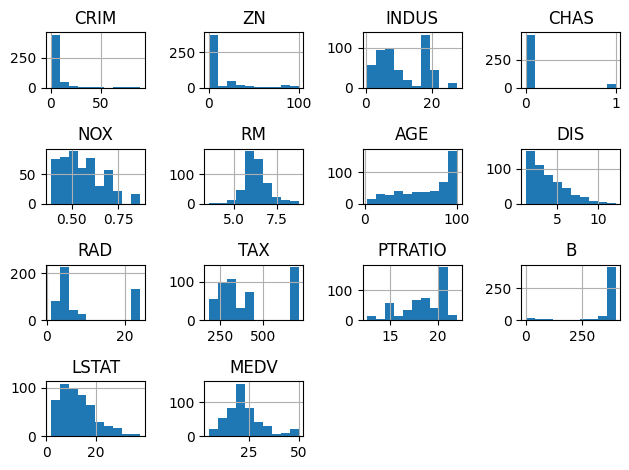

In [696]:
#特征、目标单个数据分布
df.hist()
mp.tight_layout()

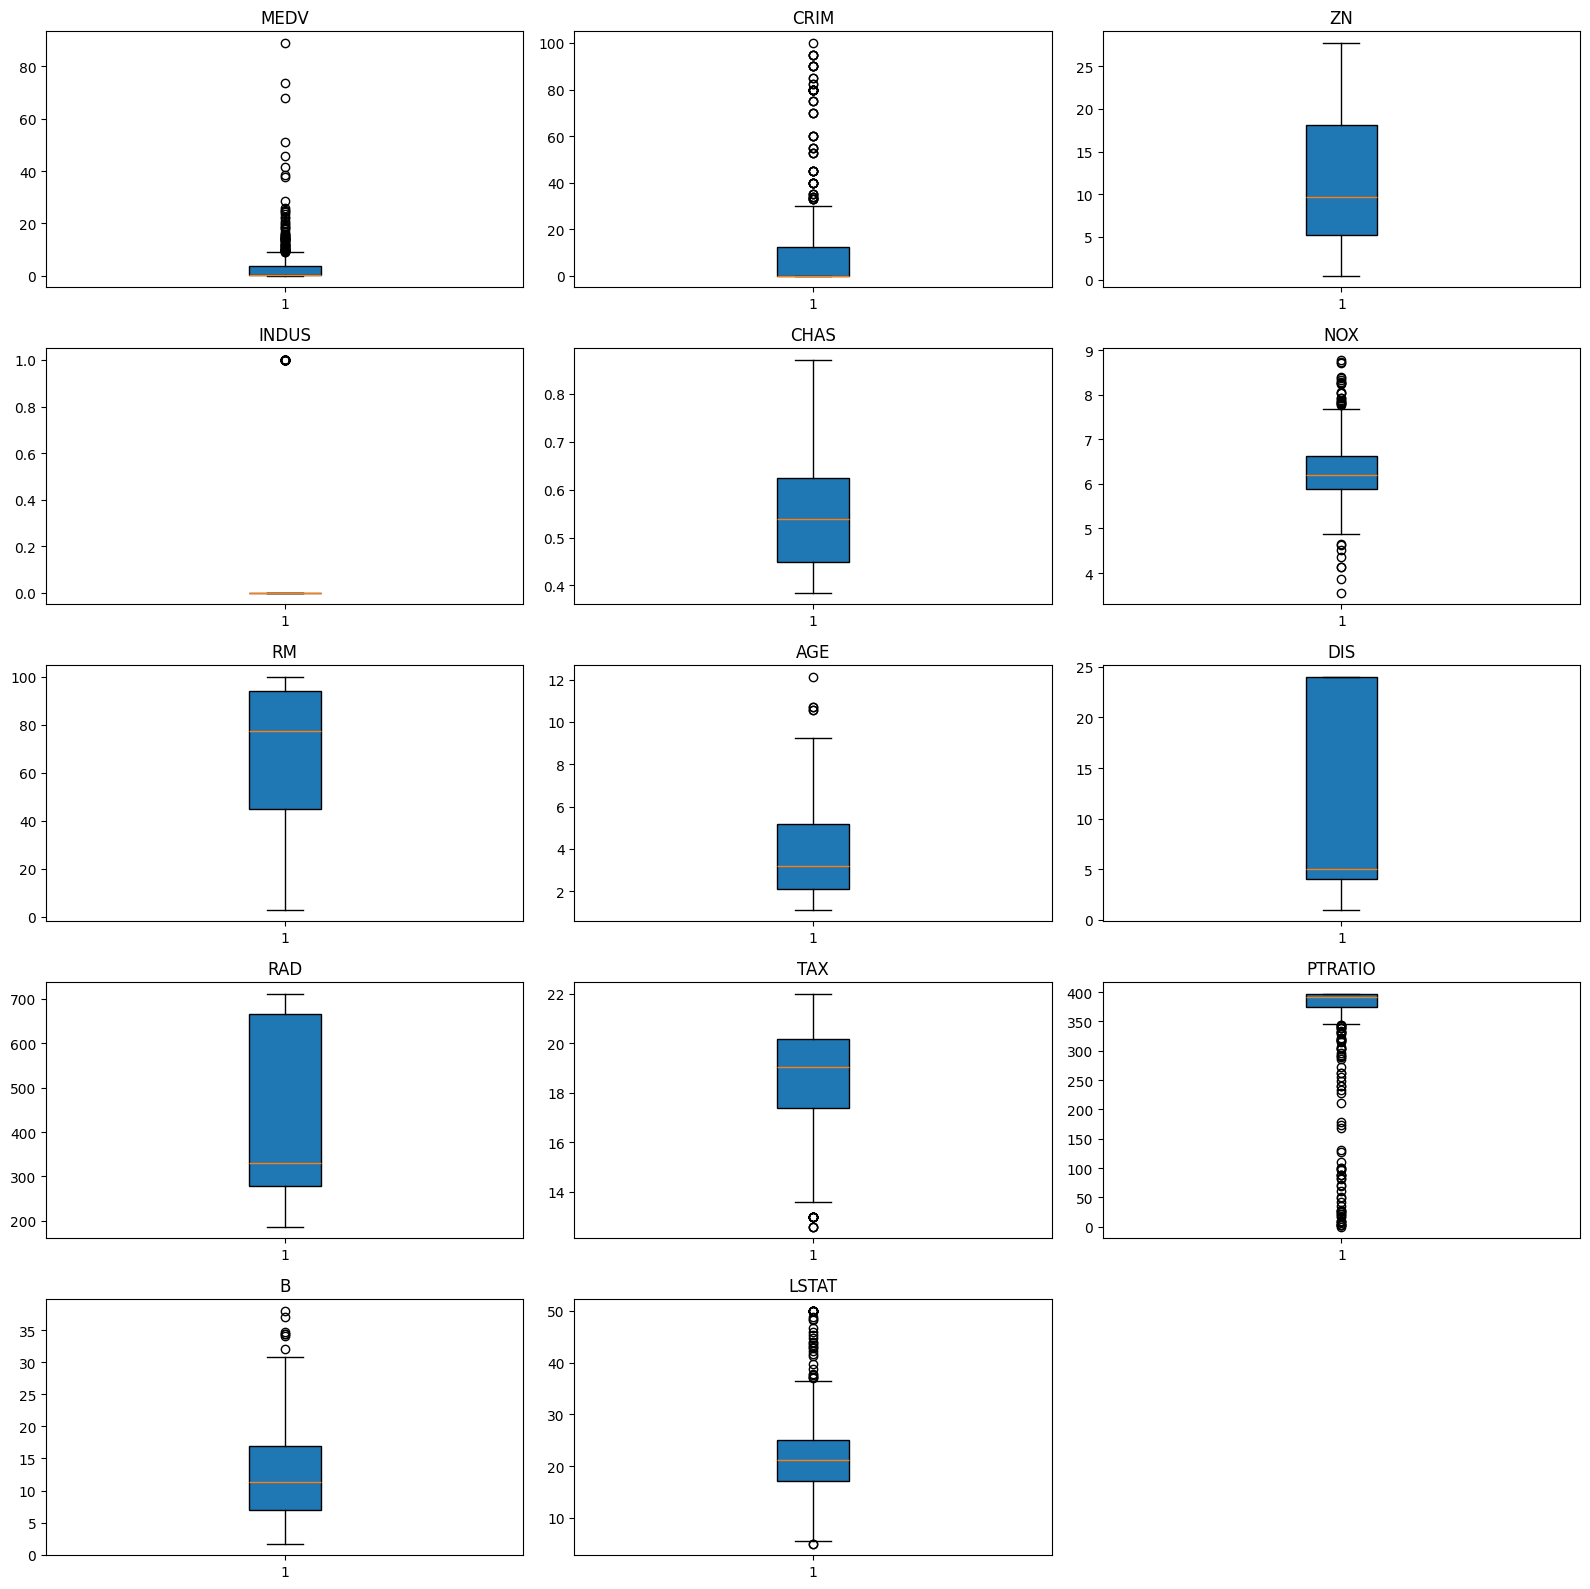

In [725]:
#特征、目标数据分布
mp.figure(figsize=(16,16))

for i in range(0,df.shape[1]):
    mp.subplot(5,3,i+1)
    mp.boxplot(df[columns[i]],patch_artist=True)
    mp.title(columns[i-1])

mp.tight_layout()

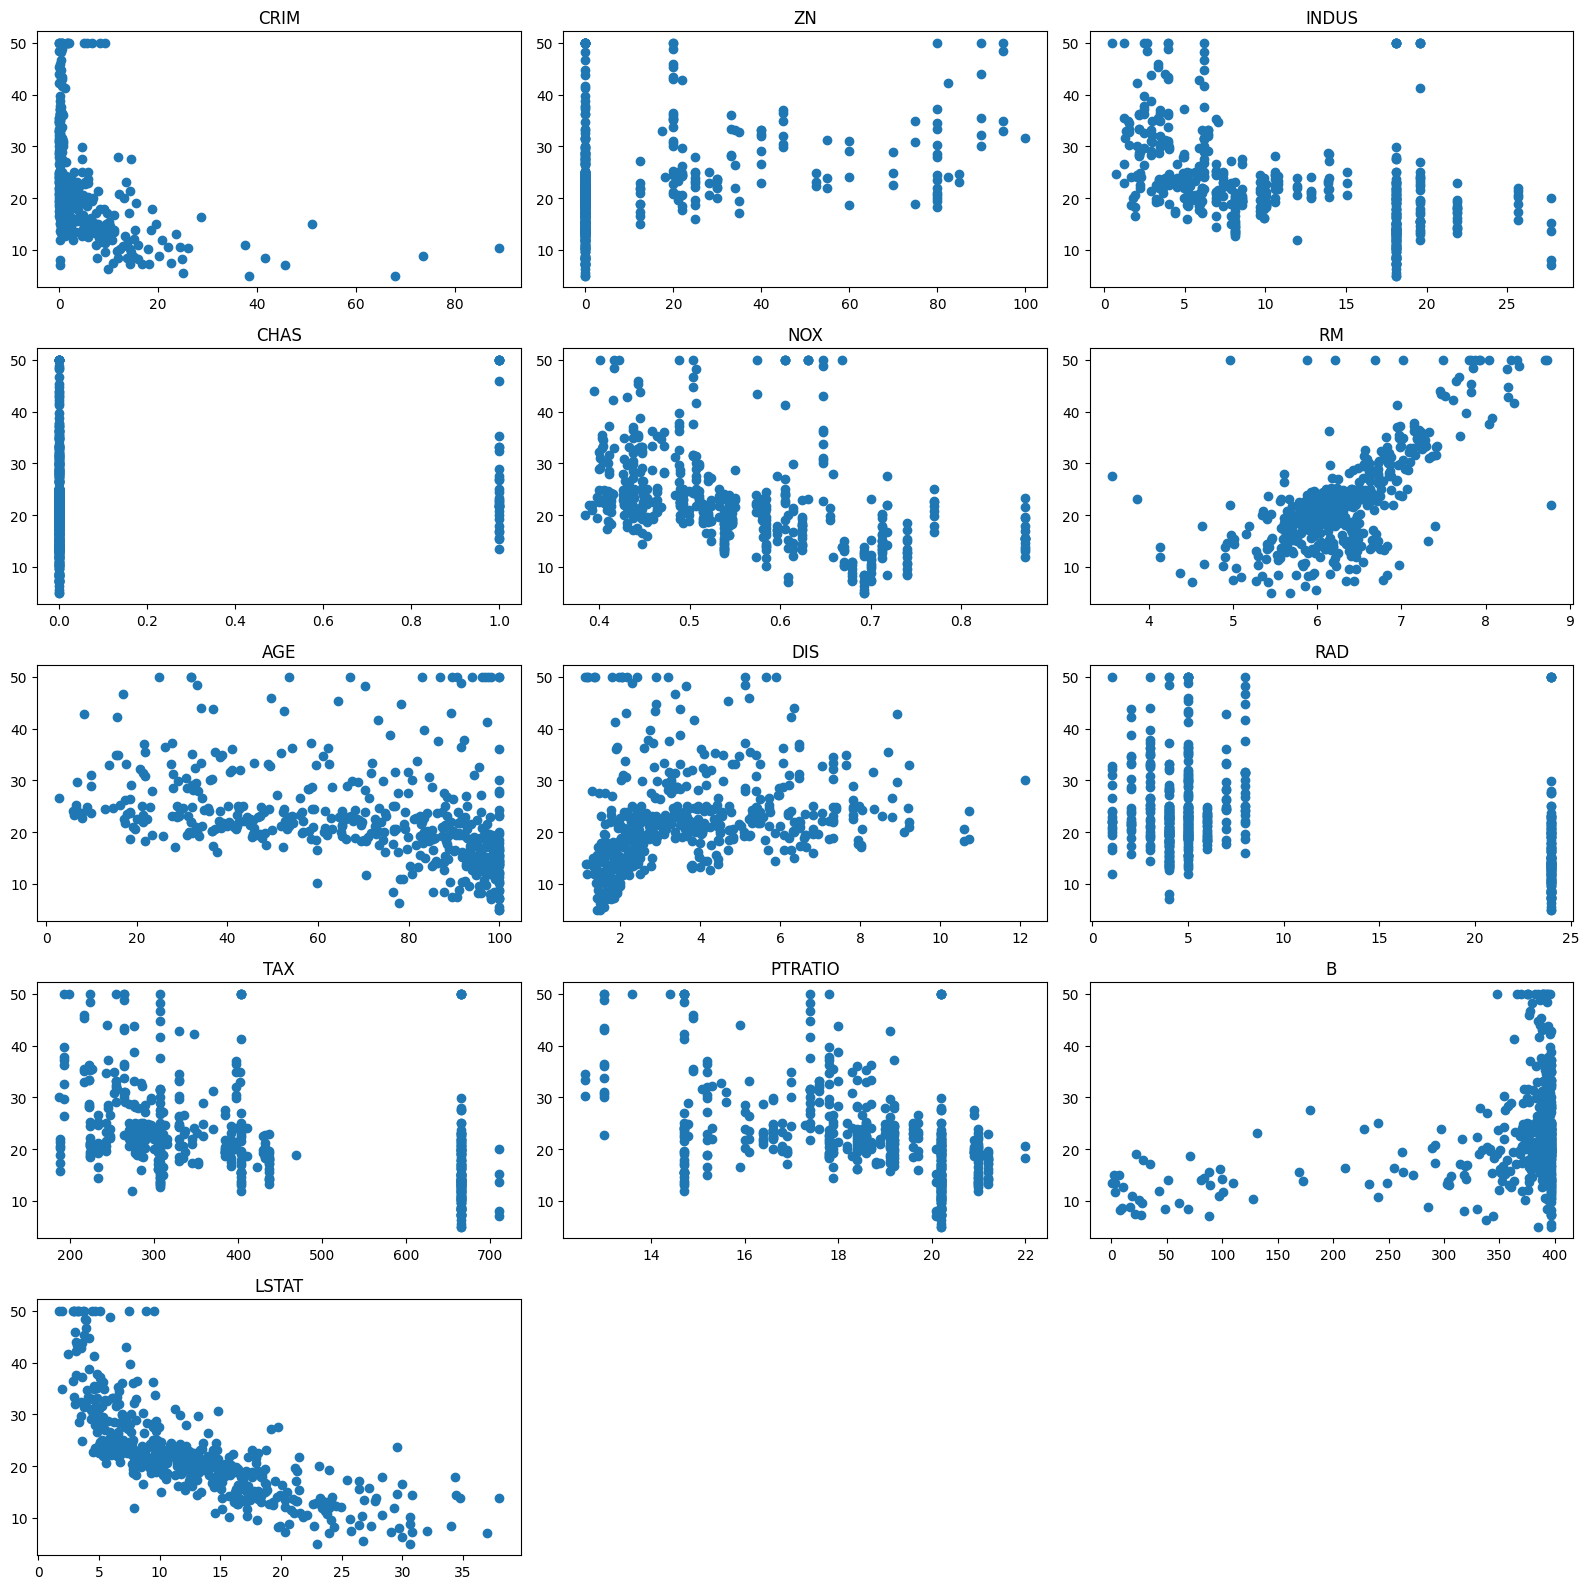

In [580]:
#特征与目标值之间数据分布关系

mp.figure(facecolor="white",figsize=(16,16))

for i in range(1,df.shape[1]):
    mp.subplot(5,3,i)
    mp.scatter(df[columns[i-1]],df["MEDV"])
    mp.title(columns[i-1])

mp.tight_layout()

In [697]:
#特征与特征、特征与目标之间的相关性
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


数据分析

CRIM——该镇的人均犯罪率，数据分布波动较大，与目标相关性较小，连续值

ZN——占地面积超过25000平方米的住宅用地比例，数据分布集中且与目标相关性较小，连续值

INDUS——城镇中非住宅用地所占比例，数据分布非常集中，与目标相关性较小，连续值

CHAS——是否邻近Charies River，数据分布波动较小，与目标的相关性最小，离散值

NOX——一氧化碳浓度，数据分布相对平缓，与目标相关性相对较小，连续值

RM——每栋住宅的房间数，与目标呈明显的正相关关系，连续值

AGE——1940年以前建成的自住单位比例，与目标相关性较小，连续值

DIS——距离5个波士顿的就业中心的加权距离，与目标相关性较小，连续值

RAD——到径向公路的可达性指数，与目标相关性较小，连续值

TAX——每一万美元的不动产税率，与目标相关性较大，连续值

PTRATIO——城镇中教师学生比例，与目标相关性较大，连续值

B——城镇中黑人的比例，数据分布波动相对较小，与目标相关性较小，连续值

LSTAT——地区中多少房东属于低收入人群，与目标呈明显的负相关关系

MEDV——同类房屋价格的中位数，目标数值，连续值

结合图像，分析得13个特征均与房价存在一定的线性关系。但部分特征数据分布集中程度大，异常值较多，需要剔除相应的特征，最终选取CRIM、NOX、RM、INDUS、PTRATIO、LSTAT


In [644]:
%%time
#训练集、测试集划分(0.8/0.2)

def classify(data,columns):
    number=data.shape[0]
    y=data[data.columns[-1]]
        
    train_x=data.loc[:number*0.8][data.columns[:data.shape[1]]]
    train_y=y.loc[:number*0.8]
    
    test_x=data.loc[number*0.8:][data.columns[:data.shape[1]]]
    test_y=y.loc[number*0.8:]
    
    return train_x,train_y,test_x,test_y
    

CPU times: total: 0 ns
Wall time: 0 ns


In [698]:
%%time
#数据预处理

#数据标准化/归一化
#normalization（标准化）
#Z_score_normalization(归一化）
#数组转化为矩阵

def prepare_for(feature_x,y,normalization=True,Z_score_normalization=False):
    #数据标准化
    if normalization==True:
        x_=(feature_x-feature_x.mean())/feature_x.std()
        
        x=np.array(x_)
        y_=np.array(y)
        
        x_new=np.insert(x,0,1,axis=1)
        
        x=np.matrix(x_new).T
        y=np.matrix(y_)
        
    else :
        if Z_score_normalization==True:

            x_=(feature_x-feature_x.min())/(feature_x.max()-feature_x.min())
            x=np.array(x_)
            y_=np.array(y)
        
            x_new=np.insert(x,0,1,axis=1)
        
            x=np.matrix(x_new).T
            y=np.matrix(y_)

    return x,y

CPU times: total: 0 ns
Wall time: 0 ns


In [699]:
%%time
#类建立，实现线性拟合进行模型训练

class model:
    def __init__(self,feature_x,true_y,number=1000,normalization=False,Z_score_normalization=True,alpha=0.001):
        #数据准备
        self.normalization=normalization
        self.Z_score_normalization=Z_score_normalization
        self.number=number
        self.alpha=alpha

        self.feature_x=feature_x
        self.true_y=true_y
        
        
        #w系数数据准备
        self.num_feature=self.feature_x.shape[0]
        self.w=np.matrix(np.zeros((1,self.num_feature)))
        self.w_num=self.w.shape
        self.w_new=np.random.normal(loc=0,scale=1,size=self.w_num)

    #预测函数
    def predict(self,x):
        predict_y=np.dot(self.w_new,x)
        return predict_y

    #误差
    def error(self):
        predict_y=self.predict(self.feature_x)
        error_y=self.true_y-predict_y
        return error_y
        
    #损失函数（均方误差）
    def cost_function(self):
        cost=self.error()
        cost=np.dot(cost.T,cost).sum()/(2*cost.size)
        return cost
    
    #梯度计算
    def gradient(self):
        error=self.error()
        gradient_data=np.dot(self.feature_x,-error.T)/self.w_new.size
        return gradient_data.T

    #数据更新（梯度下降）
    def updata(self,alpha):
        self.w_new=self.w_new-alpha*self.gradient()
        

    #梯度下降迭代
    def gradient_descent(self,alpha,number):
        list_cost=[]
        count=0
        for i in range(number):
            cost=self.cost_function()
            if cost>=0.1:
                count+=1
                self.updata(alpha)
                list_cost.append(cost)
            else:
                break
        return count,list_cost

    #训练
    def train(self):
        number,list_cost=self.gradient_descent(self.alpha,self.number)
        return list_cost,self.predict(self.feature_x)
    
    #测试
    def test(self,test_x):
        test_predict_y=self.predict(test_x)
        return test_predict_y

CPU times: total: 0 ns
Wall time: 0 ns


In [726]:
%%time
#数据训练

#数据准备

#特征选取
columns1=["RM","LSTAT","PTRATIO","CRIM","INDUS","NOX","MEDV"]

#训练集、测试集划分

train_x,train_y,test_x,test_y=classify(df[columns1[:]],columns1)

#数据标准化/归一化，矩阵转化
train_x,train_y=prepare_for(train_x,train_y,normalization=True,Z_score_normalization=False)
test_x,test_y=prepare_for(test_x,test_y,normalization=True,Z_score_normalization=False)

#参数设定
#默认设置迭代次数
num=1000
#学习率
alpha=0.001

#训练模型
#对象建立（模型）
model1=model(train_x,train_y,normalization=True,Z_score_normalization=False,number=num,alpha=alpha)

#获取训练预测值
train_cost,train_predict_y=model1.train()

#获取测试预测值
test_predict_y=model1.test(test_x)


CPU times: total: 46.9 ms
Wall time: 116 ms


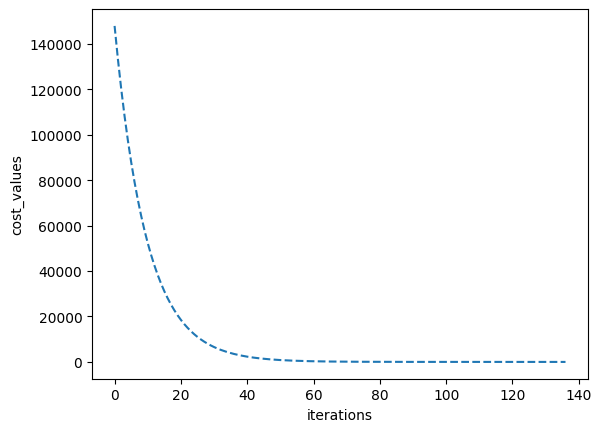

In [727]:
#数据可视化

#损失值可视化

mp.figure("cost")
mp.xlabel("iterations")
mp.ylabel("cost_values")
mp.plot(range(len(train_cost)),train_cost,linestyle='--')
mp.show()

均方误差值随着迭代的次数不断下降，且下降的速度由快逐渐减慢

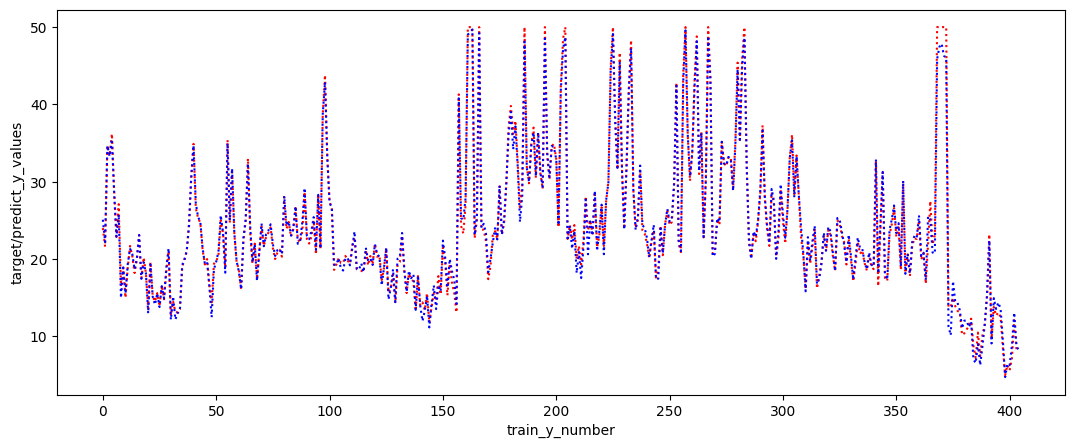

In [734]:
#训练数据可视化

number=train_y.shape[1]
mp.figure("train",figsize=(13,5))
mp.xlabel("train_y_number")
mp.ylabel("target/predict_y_values")
mp.plot(range(number),train_y.T,color='red',linestyle=':')
mp.plot(range(number),train_predict_y.T,color='blue',linestyle=':')
mp.show()


有图像可知，训练的模型所获得的预测值与目标值高度吻合，很明显，机器能够学习到目标值的变化趋势

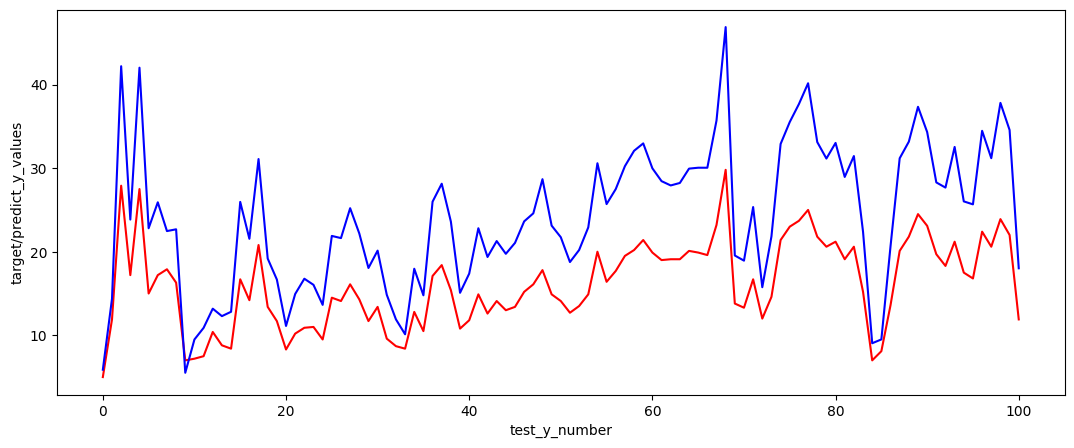

In [735]:
#测试数据可视化

number2=test_y.shape[1]
mp.figure("test",figsize=(13,5))
mp.xlabel("test_y_number")
mp.ylabel("target/predict_y_values")
mp.plot(range(number2),test_y.T,color='red')
mp.plot(range(number2),test_predict_y.T,color='blue')
mp.show()

测试集的预测值明显与目标值吻合度低，但其变化趋势与目标值的变化趋势保持一致

该现象明显是由于过拟合导致的，可以利用正则化适当修正系数值解决该问题
